We will perform CNN on Credit Card Dataset to check whether the transactions are fraud or not.

In [4]:
# import the important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
# import the dataset
data=pd.read_csv('/content/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
# check the shape of the dataset
data.shape

(284807, 31)

Here there are 31 columns and the last column is the target variable named Class

In [7]:
# we will check if there are any null values in the dataset
data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


We can see that there is no null value in the dataset

We will check the datatype of the values in all columns

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

from observing the dataset and from the info, we can see that our target column consists of values consisting 0 and 1.

In [9]:
# we can check that how many values are present in the 'class' having values as 0 or 1
data['Class'].value_counts()

,count
Class,
0,284315
1,492


Here there are legitimate 284315 transactions and the transactions which are fraud are only 492.

So we can say that data is highly imbalanced, we will balance the dataset

* Balancing the dataset

In [10]:
# dividing the dataframe into fraud and non fraud data
non_fraud=data[data['Class']==0]
fraud=data[data['Class']==1]

In [11]:
non_fraud.shape, fraud.shape

((284315, 31), (492, 31))

We are going to make the non_fraud data frame of the same size of the fraud.shape to match the entries,

In [12]:
# now we are going to select the 492 non-fraud entries from the dataframe
non_fraud=non_fraud.sample(fraud.shape[0])
non_fraud.shape

(492, 31)

Now that we have data that is balanced, we will merge the dataset of non_fraud and fraud transactions

In [13]:
data = pd.concat([fraud, non_fraud], ignore_index=True)
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,60865.0,1.154085,-0.537478,1.082873,0.285806,-1.338072,-0.405269,-0.697715,0.117134,1.389900,...,-0.230442,-0.529621,0.069710,0.439904,0.083619,0.943166,-0.047357,0.016845,37.73,0
980,126474.0,-1.136992,-0.111325,0.231010,1.367607,-1.119532,1.184770,1.613335,0.464020,-0.143304,...,-0.125597,-0.997467,1.233081,0.478094,-0.595447,-1.042791,-0.011080,0.187753,439.29,0
981,159989.0,-1.289469,1.737021,-0.275725,0.579540,0.957768,0.146583,0.785632,0.523855,-1.196928,...,0.096138,0.188004,-0.673763,-1.093717,1.187889,-0.185721,-0.645728,-0.329022,5.34,0
982,76157.0,1.020244,-0.303081,1.215219,1.620950,-0.737809,0.907879,-0.687964,0.481975,1.129959,...,-0.369529,-0.687157,0.075466,0.000682,0.361965,-0.524817,0.079904,0.018034,18.99,0


Now we can say that the data is balanced now and concated

In [14]:
# now let us again check the value counts
data.Class.value_counts()

,count
Class,
1,492
0,492


In [15]:
# now dividing the dataframe into dependent and independent varaible
X=data.drop(['Class'], axis=1)
y=data.Class

# check the shape
X.shape, y.shape

((984, 30), (984,))

In [16]:
# we will divide the dataset into training and testing dataset
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=99)

# check the shape again
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((787, 30), (197, 30), (787,), (197,))

In [17]:
X_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
518,72189.0,-0.675074,1.419169,1.126863,0.412800,0.623864,-1.586675,1.117082,-0.246229,-0.831552,...,-0.043662,0.079000,0.228075,-0.252576,0.798584,0.208620,-0.524666,0.115350,0.160827,1.00
101,36170.0,-5.685013,5.776516,-7.064977,5.902715,-4.715564,-1.755633,-6.958679,3.877795,-5.541529,...,0.299489,1.128641,-0.962960,-0.110045,-0.177733,-0.089175,-0.049447,0.303445,0.219380,111.70
952,67529.0,1.246498,-1.297073,1.459837,-0.396767,-1.754179,1.055327,-1.885926,0.647792,0.789242,...,-0.115506,0.172695,0.757966,-0.088928,-0.282995,0.349737,-0.006278,0.084655,0.005857,4.00
269,84694.0,-4.868108,1.264420,-5.167885,3.193648,-3.045621,-2.096166,-6.445610,2.422536,-3.214055,...,0.667310,1.269205,0.057657,0.629307,-0.168432,0.443744,0.276539,1.441274,-0.127944,12.31
512,122864.0,2.039169,-0.131987,-1.479601,0.097006,0.447442,-0.179636,0.056222,-0.045976,0.555785,...,-0.198229,-0.244808,-0.645164,0.248779,0.151492,-0.067306,-0.604065,-0.022945,-0.057366,9.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
713,87898.0,-3.123039,-1.724140,-0.211014,-1.862211,1.367140,4.605411,0.486297,0.596781,1.391914,...,-2.234722,-0.367730,1.154290,1.049777,0.807822,0.039172,0.054885,0.444713,-0.373574,304.98
168,51155.0,-11.205461,7.914633,-13.987752,4.333341,-8.484970,-3.506561,-8.935243,7.704449,-2.336584,...,0.860912,0.942593,-0.987848,-0.279446,-0.027299,0.644344,-0.263078,1.084023,0.211933,99.99
185,56650.0,-8.762083,2.791030,-7.682767,6.991214,-5.230695,-0.357388,-9.685621,1.749335,-4.495679,...,-0.460390,-0.090527,0.348590,0.051132,-0.415430,0.219665,0.330020,-0.028252,-0.156270,7.52
35,13323.0,-5.454362,8.287421,-12.752811,8.594342,-3.106002,-3.179949,-9.252794,4.245062,-6.329801,...,1.305862,1.846165,-0.267172,-0.310804,-1.201685,1.352176,0.608425,1.574715,0.808725,1.00


We can see that our data is highly varied, we need to scale our data.

We will scale our data using Standard Scaler

In [18]:
# scaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [19]:
X_train,y_train

(array([[-0.32621158,  0.30745617, -0.13163701, ...,  0.03392299,
          0.28108207, -0.34770618],
        [-1.07595792, -0.61636842,  1.08559866, ...,  0.21327718,
          0.42451151,  0.02704133],
        [-0.42321089,  0.66179106, -0.89042598, ...,  0.00465445,
         -0.09852488, -0.33755042],
        ...,
        [-0.64966055, -1.18377511,  0.25159581, ..., -0.10300605,
         -0.49566435, -0.32563433],
        [-1.5515251 , -0.57383663,  1.78702597, ...,  1.42547457,
          1.86814201, -0.34770618],
        [-0.32131999,  0.62626138, -0.64979183, ..., -0.09430446,
         -0.0900337 , -0.209554  ]]),
 518    0
 101    1
 952    0
 269    1
 512    0
       ..
 713    0
 168    1
 185    1
 35     1
 641    0
 Name: Class, Length: 787, dtype: int64)

y_train,y_test are in series , we will convert the same into an array

In [20]:
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()

In [21]:
X_train.shape

(787, 30)

Here we will have to change the shape so that our model can process the data

In [22]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

# check the shape again
X_train.shape, X_test.shape

((787, 30, 1), (197, 30, 1))

Now we will build our model

In [23]:
# import the libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv1D,BatchNormalization,Dropout

In [24]:
# import model
model=Sequential()
# layers
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# build ANN
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='relu'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
# summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 29, 32)         │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 29, 32)         │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 29, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 28, 64)         │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 28, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 28, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1792)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       114,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 119,457 (466.63 KB)

 Trainable params: 119,265 (465.88 KB)

 Non-trainable params: 192 (768.00 B)

In [26]:
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [27]:
%%time
# fitting the model
history=model.fit(X_train,y_train,epochs=20,validation_data=(X_test,y_test))

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.7707 - loss: 3.1947 - val_accuracy: 0.8426 - val_loss: 1.6839
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8812 - loss: 1.8277 - val_accuracy: 0.8934 - val_loss: 0.7317
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8980 - loss: 1.5955 - val_accuracy: 0.8426 - val_loss: 0.5479
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9012 - loss: 1.5849 - val_accuracy: 0.5533 - val_loss: 3.3893
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9032 - loss: 1.5606 - val_accuracy: 0.5178 - val_loss: 6.3598
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9048 - loss: 1.5350 - val_accuracy: 0.5178 - val_loss: 6.7174
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8877 - loss: 1.8049 - val_accuracy: 0.5076 - val_loss: 7.2342
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9034 - loss: 1.5461 - val_accuracy: 0.5228 - v

In [28]:
# plot
def plot_learningcurve(history,epochs):
  epoch=range(1,epochs+1)
  # accuracy
  plt.plot(epoch, history.history['accuracy'])
  plt.plot(epoch, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend(['train','val'], loc='upper left')
  plt.show()

  # loss
  plt.plot(epoch, history.history['loss'])
  plt.plot(epoch, history.history['val_loss'])
  plt.title('Model loss')
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.legend(['train','val'], loc='upper left')
  plt.show()

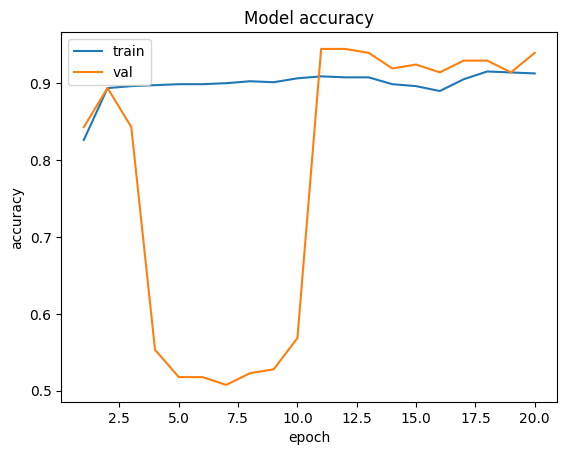

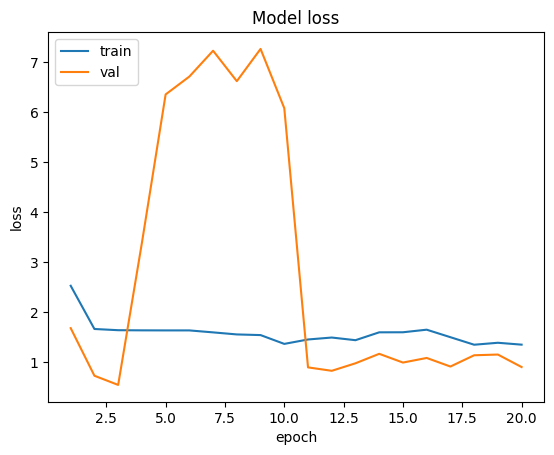

In [29]:
plot_learningcurve(history,20)